In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Load flowers dataset

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:

list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/578938011_34918b1468.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4606893762_c2f26c7e91_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8083321316_f62ea76f72_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2326334426_2dc74fceb1.jpg'),
 PosixPath('datasets/flower_photos/dandelion/16987075_9a690a2183.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3465443774_6b0c75a3b1_n.jpg'),
 PosixPath('datasets/flower_photos/roses/909277823_e6fb8cb5c8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg'),
 PosixPath('datasets/flower_photos/roses/6241886381_cc722785af.jpg'),
 PosixPath('datasets/flower_photos/roses/2215318403_06eb99176a.jpg')]

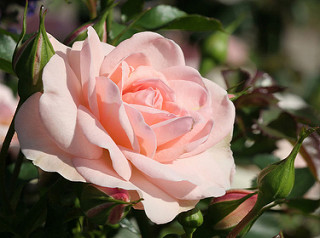

In [ ]:
PIL.Image.open(str(roses[1]))

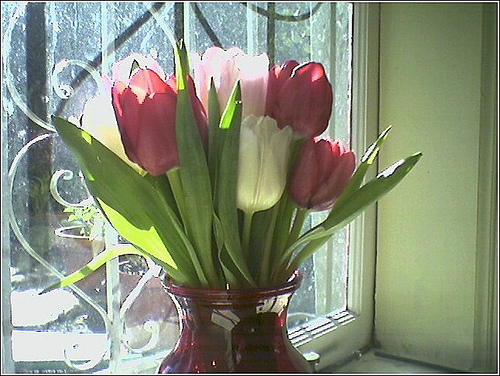

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

Read flowers images from disk into numpy array using opencv

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/3465443774_6b0c75a3b1_n.jpg'),
 PosixPath('datasets/flower_photos/roses/909277823_e6fb8cb5c8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg'),
 PosixPath('datasets/flower_photos/roses/6241886381_cc722785af.jpg'),
 PosixPath('datasets/flower_photos/roses/2215318403_06eb99176a.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/3465443774_6b0c75a3b1_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(240, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Preprocessing: scale images

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Build convolutional neural network and train it

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=4)

Epoch 1/4
86/86 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.3155 - loss: 1.5892
Epoch 2/4
86/86 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.5843 - loss: 1.0717
Epoch 3/4
86/86 ━━━━━━━━━━━━━━━━━━━━ 84s 982ms/step - accuracy: 0.6661 - loss: 0.8687
Epoch 4/4
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 969ms/step - accuracy: 0.7593 - loss: 0.6408


Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 320ms/step - accuracy: 0.6498 - loss: 1.0341


[1.0282843112945557, 0.6427015066146851]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 374ms/step


array([[ 1.853204  ,  3.3203046 , -1.8092914 ,  0.9033993 ,  4.0299497 ],
       [ 2.6748362 ,  0.93831295,  3.4186397 , -2.2425277 ,  2.0631676 ],
       [-1.21758   , -0.8360472 , -0.55667573,  2.7818365 ,  2.8860226 ],
       ...,
       [ 1.8663986 , -1.91341   , -4.044568  ,  4.6933546 ,  1.526233  ],
       [ 3.5267742 ,  3.7931879 ,  0.80432755, -1.74582   ,  1.8101773 ],
       [-3.9505024 , -3.5405278 , -0.16057962,  6.861294  , -0.6041918 ]],
      dtype=float32)

In [ ]:

score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

4

In [ ]:
y_test[0]

1

Improve Test Accuracy Using Data Augmentation

In [ ]:
img_height = 180
img_width = 180
batch_size = 32
from tensorflow.keras import layers
from tensorflow.keras import Sequential

data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Original Image

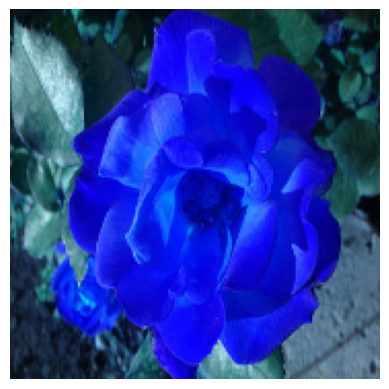

In [ ]:
plt.axis('off')
plt.imshow(X[0])

Newly generated training sample using data augmentation

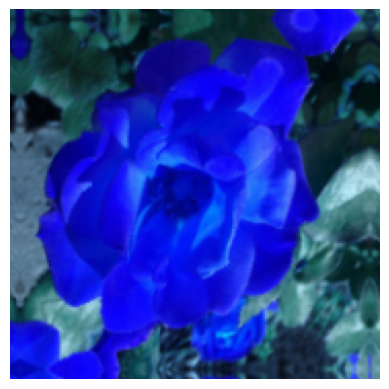

In [ ]:
import matplotlib.pyplot as plt

# Assuming X is your input image
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))
plt.show()


Train the model using data augmentation and a drop out layer

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=4)

Epoch 1/4
86/86 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.3767 - loss: 1.4177
Epoch 2/4
86/86 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.5906 - loss: 1.0218
Epoch 3/4
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6135 - loss: 0.9603
Epoch 4/4
86/86 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.6608 - loss: 0.8511


In [41]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 561ms/step - accuracy: 0.6458 - loss: 0.9250


[0.9092550873756409, 0.6623093485832214]